In [9]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [15]:
print(len(bream_length), len(smelt_length)) # 도미 35개, 빙어 14개 = 총 49개

35 14


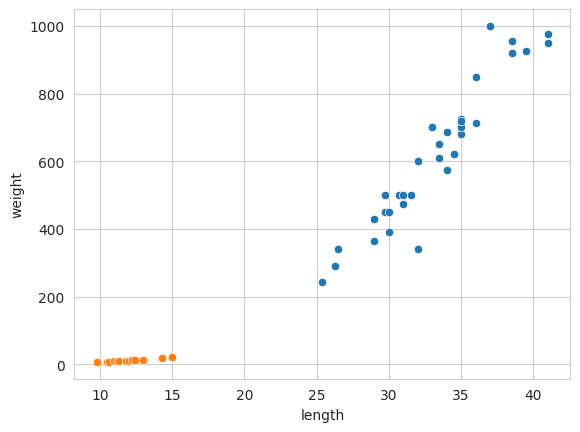

In [14]:
sns.scatterplot(x=bream_length, y=bream_weight)
sns.scatterplot(x=smelt_length, y=smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# K-NN Algorithm (K-최근접 이웃 알고리즘)
- 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용
- 사용하기 위해서는 데이터를 모두 가지고 있는 게 전부
- 단점: 데이터가 아주 많은 경우 사용하기 어려움(메모리 많이 필요, 직선거리 계산에 많은 시간 소요)
- 사이킷런의 KNeighborsClassifier() 클래스 사용
  - 하이퍼 파라미터로 n_neighbors가 있음(참고 데이터 갯수, default=5)

- 관련 함수들
  - fit(X=훈련에 사용할 특성 데이터, y=정답 데이터): 훈련할 때 사용
  - predict(특성 데이터): 모델을 훈련하고 예측할 때 사용
  - score(특성 데이터, 정답 데이터): 모델의 성능을 측정

In [18]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [19]:
fish_data = [[l, w] for l, w in zip(length, weight)]
# 리스트 내포
# [l, w] for l, w zip(length, weight)을 먼저 한 다음 한번 더 대괄호로 묶어서 2차원 리스트로 만들기

In [21]:
fish_data[:5] # [length(길이), weight(무게)] 꼴로 묶인 2차원 행렬

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [22]:
fish_target = [1] * 35 + [0] * 14
print(fish_target) # 1은 도미, 0은 빙어

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier()

In [26]:
knn.fit(X=fish_data, y=fish_target)

KNeighborsClassifier()

In [27]:
knn.score(fish_data, fish_target) # model evaluation

1.0

In [29]:
answer = knn.predict([[30, 600]])

In [30]:
if answer == 1:
  print('도미')
else:
  print('빙어')

도미


In [31]:
answer = knn.predict([[10, 600]])

In [32]:
if answer == 1:
  print('도미')
else:
  print('빙어')

도미


In [35]:
answer = knn.predict([[10, 100]])

In [36]:
if answer == 1:
  print('도미')
else:
  print('빙어')

빙어


In [37]:
print(knn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [39]:
print(knn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [40]:
kn49 = KNeighborsClassifier(n_neighbors=49)

In [41]:
kn49.fit(X=fish_data, y=fish_target)

KNeighborsClassifier(n_neighbors=49)

In [42]:
kn49.score(fish_data, fish_target)

0.7142857142857143

In [44]:
print(35/49) # 어떤 데이터를 넣더라도 도미로 예측한다는 것을 확인 가능

0.7142857142857143
